# Predicting monthly milk production using Time Series Analysis

Given is the average monthly production of milk from the years 1962 - 1976

Proble Statement: Develop a model that can accurately predict average monthly milk production for the future 18 months 

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize']=12,7

In [3]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

df.head()

df.tail()

df.columns = ['Month','Milk/cow']
df.head()

,Month,Milk/cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [4]:
df.isna().sum()
df.isnull().sum()

Month       0
Milk/cow    1
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 2 columns):
Month       168 non-null datetime64[ns]
Milk/cow    168 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [7]:
df.set_index('Month',inplace=True)

In [8]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

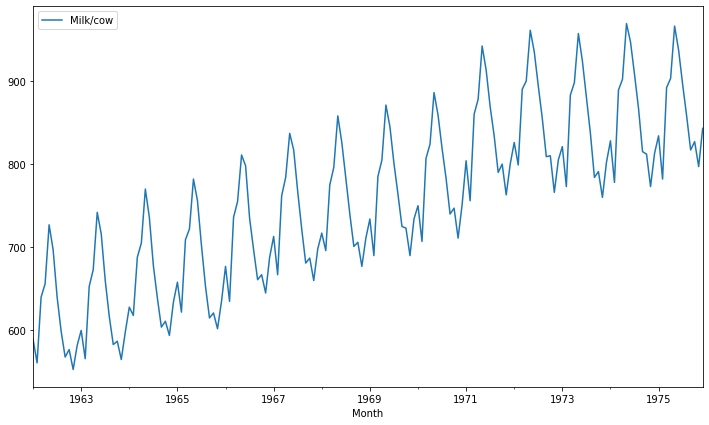

In [9]:
df.plot()

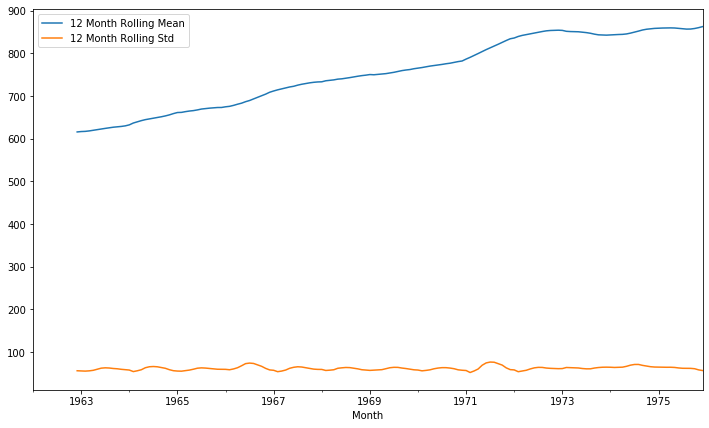

In [10]:
#checking for rolling mean / std test
ts = df['Milk/cow']
ts.rolling(12).mean().plot(label='12 Month Rolling Mean')
ts.rolling(12).std().plot(label='12 Month Rolling Std')
#ts.plot()
plt.legend(loc='best')
#plot likes there is a incresing trend in the data

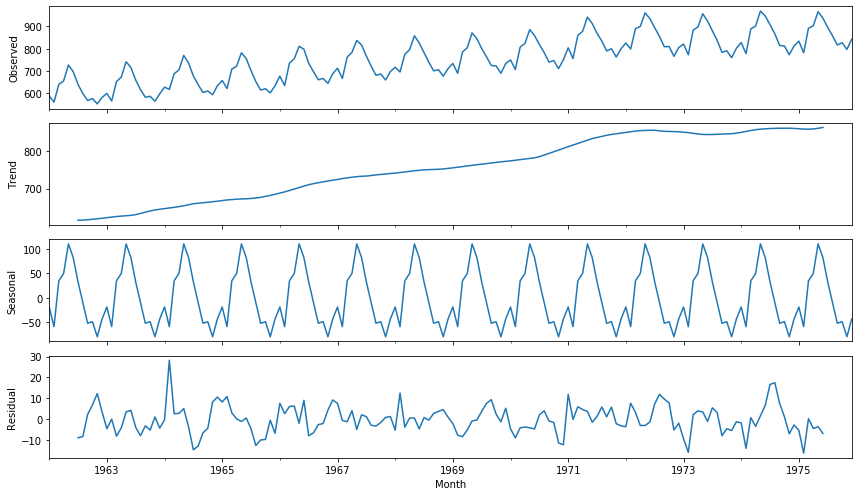

In [11]:
#will decompose to individual parts
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Milk/cow'])  

#fig = plt.figure()  
fig = decomposition.plot() 

In [12]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
result

(-1.3038115874221317,
 0.6274267086030305,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [13]:
#Mathematically testing stationarity by agumented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
#Creating function for later use
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")



In [14]:
#Check if the time series is Stationary or Not.
adf_check(df['Milk/cow'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3038115874221317
p-value : 0.6274267086030305
#Lags Used : 13
Number of Observations Used : 154
weak evidence against null hypothesis, time series is non-stationary 


In [15]:
df['Milk First Difference'] = df['Milk/cow'] - df['Milk/cow'].shift(1)

In [16]:
from statsmodels.tsa.statespace.tools import diff
df['Milk First Difference']= diff(df['Milk/cow'],k_diff=1)

In [21]:
a

array([13, 17, 17,  9, 19, 10,  8])

In [17]:
a = np.random.randint(1,20,7)
diff(a,k_diff=1)

array([ 4,  0, -8, 10, -9, -2])

In [18]:
diff(a,k_seasonal_diff=1,seasonal_periods=1)

array([ -4,  -8,  18, -19,   7])

In [19]:
diff(a,k_diff=2)

array([ -4,  -8,  18, -19,   7])

In [20]:
diff(a,k_seasonal_diff=1,seasonal_periods=2)

array([-12,  10,  -1, -12])

,Milk/cow,Milk First Difference
Month,,
1962-01-01,589.0,NaN
1962-02-01,561.0,-28.0
1962-03-01,640.0,79.0
1962-04-01,656.0,16.0
1962-05-01,727.0,71.0


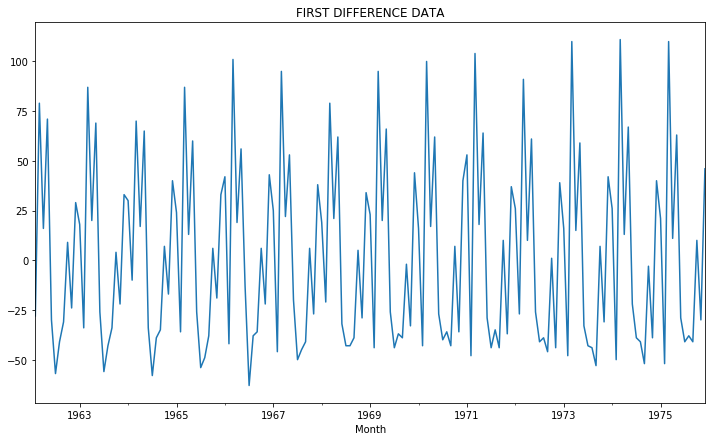

In [22]:
df['Milk First Difference'].plot(title="FIRST DIFFERENCE DATA").autoscale(axis='x',tight=True);
#autoscale(enable=True, axis='both', tight=None)[source]
df.head()

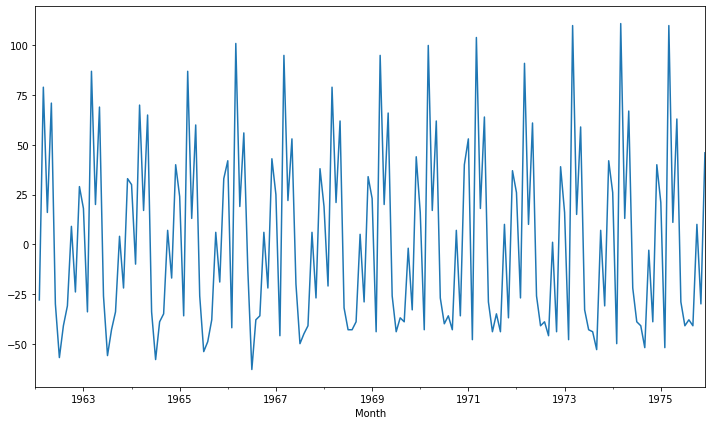

In [23]:
df['Milk First Difference'].plot()

In [24]:
adf_check(df['Milk First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0549955586530895
p-value : 0.030068004001784086
#Lags Used : 14
Number of Observations Used : 152
strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary


Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.335419314359397
p-value : 0.16079880527711382
#Lags Used : 12
Number of Observations Used : 143
weak evidence against null hypothesis, time series is non-stationary 


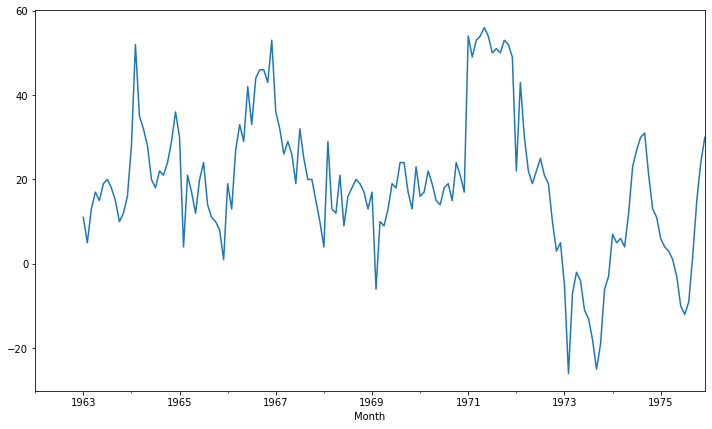

In [25]:
#Checking Seasonal diffrence
df['Seasonal Difference'] = df['Milk/cow'] - df['Milk/cow'].shift(12)
df['Seasonal Difference'].plot()
adf_check(df['Seasonal Difference'].dropna())

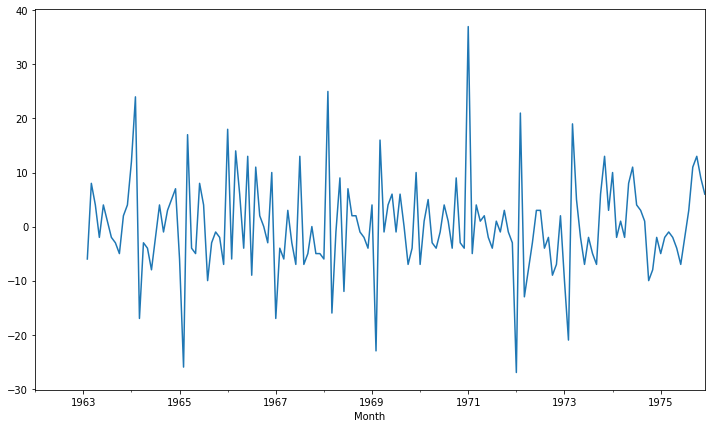

In [26]:
#Checking for seasonal first diffrence
df['Seasonal First Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(12)


df['Seasonal First Difference'].plot()

In [27]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.03800227492198
p-value : 1.865423431878859e-05
#Lags Used : 11
Number of Observations Used : 143
strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary


In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\Shrey Shah\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


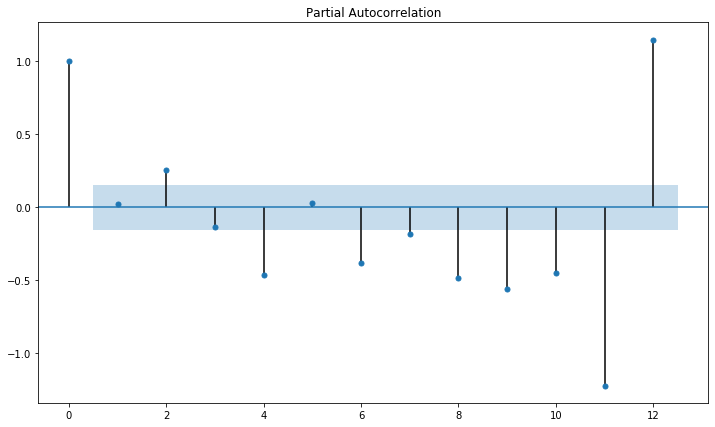

In [29]:
fig_first = plot_pacf(df["Milk First Difference"].dropna(),lags=12)

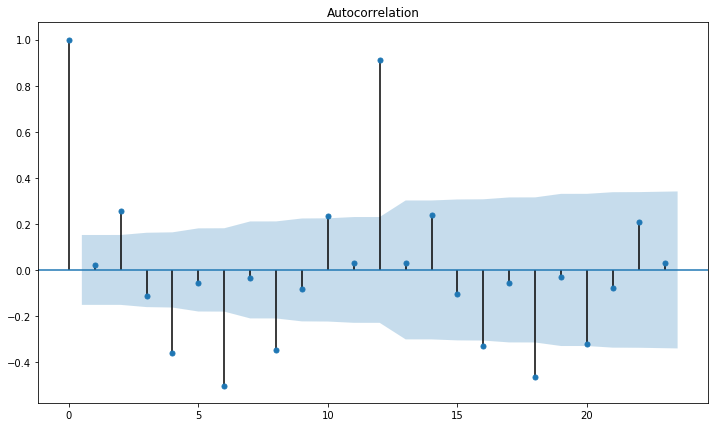

In [30]:
fig_first = plot_acf(df["Milk First Difference"].dropna())

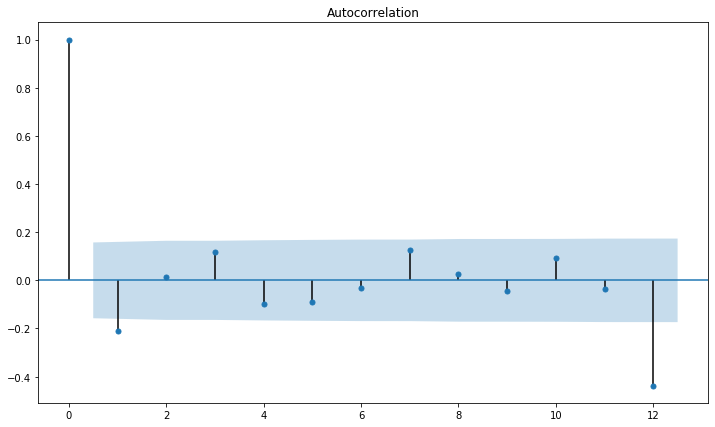

In [31]:
fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna(),lags=12)

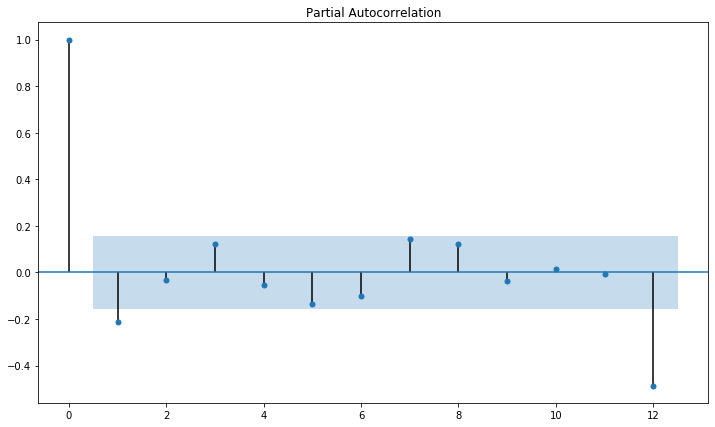

In [32]:
fig1 =plot_pacf(df['Seasonal First Difference'].dropna(),lags=12)

In [33]:
# We have seasonal data!
model = sm.tsa.statespace.SARIMAX(df['Milk/cow'],
                                  order=(1,1,1), seasonal_order=(1,2,1,12))#1,1,1 & 1,2,1
results = model.fit()
print(results.summary())



C:\Users\Shrey Shah\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           Milk/cow   No. Observations:                  168
Model:             SARIMAX(1, 1, 1)x(1, 2, 1, 12)   Log Likelihood                -519.069
Date:                            Mon, 09 Mar 2020   AIC                           1048.139
Time:                                    00:31:47   BIC                           1062.953
Sample:                                01-01-1962   HQIC                          1054.159
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2127      0.394     -0.540      0.589      -0.985       0.559
ma.L1         -0.0258      0.404   

In [46]:
# New Codes for p,d,q and P, D, Q
#pip install numpy==1.16.1
#pip install pmdarima

from pmdarima import auto_arima

stepwise_fit = auto_arima(df['Milk/cow'], start_p=0, start_q=0,
                          max_d = 5,max_p=6, max_q=3, m=12,start_P=0,start_Q=0,
                          max_P=6, D=2, max_Q=5,max_D=5,
                          seasonal=True,
                          d=1, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (0, 1, 0)x(0, 2, 0, 12) (constant=True); AIC=1194.379, BIC=1200.304, Time=0.031 seconds
Fit ARIMA: (1, 1, 0)x(1, 2, 0, 12) (constant=True); AIC=1114.963, BIC=1126.815, Time=0.407 seconds
Fit ARIMA: (0, 1, 1)x(0, 2, 1, 12) (constant=True); AIC=1073.343, BIC=1085.195, Time=0.824 seconds
Near non-invertible roots for order (0, 1, 1)(0, 2, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 0)x(0, 2, 0, 12) (constant=False); AIC=1192.379, BIC=1195.342, Time=0.023 seconds
Fit ARIMA: (1, 1, 0)x(0, 2, 0, 12) (constant=True); AIC=1188.437, BIC=1197.325, Time=0.168 seconds
Fit ARIMA: (1, 1, 0)x(2, 2, 0, 12) (constant=True); AIC=1091.733, BIC=1106.547, Time=1.347 seconds
Fit ARIMA: (1, 1, 0)x(3, 2, 0, 12) (constant=True); AIC=1059.781, BIC=1077.558, Time=2.889 seconds
Fit ARIMA: (1, 1, 0)x(4, 2, 0, 12) (constant=True); AIC=1044.551, BIC=1065.291, Time=4.302 seconds
Fit A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  168
Model:             SARIMAX(1, 1, 0)x(4, 2, 1, 12)   Log Likelihood                -507.559
Date:                            Mon, 09 Mar 2020   AIC                           1031.118
Time:                                    00:44:35   BIC                           1054.820
Sample:                                         0   HQIC                          1040.749
                                            - 168                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0634      0.239     -0.265      0.791      -0.533       0.406
ar.L1         -0.1711      0.088     -1.947      0.052      -0.343       0.001
ar.S.L12      -0.7884      0.162     -4.867      0.000      -1.106      -0.471
ar.S.L24      -0.5882      0.195     -3.016      0.003      -0.971      -0.206
ar.S.L36      -0.4808      0.187     -2.577      0.010      -0.847      -0.115
ar.S.L48      -0.1507      0.130     -1.157      0.247      -0.406       0.105
ma.S.L12      -0.9993     59.949     -0.017      0.987    -118.497     116.498
sigma2        44.6961   2674.543      0.017      0.987   -5197.312    5286.704
===================================================================================
Ljung-Box (Q):                       23.35   Jarque-Bera (JB):                27.13
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.60
Prob(H) (two-sided):                  0.91   Kurtosis:                         4.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

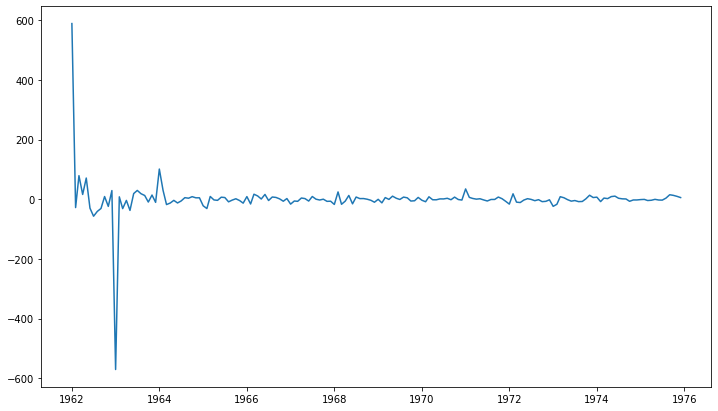

In [47]:
resid=pd.DataFrame(results.resid,columns=['Residual'])
plt.plot(resid['Residual'])

Text(0.5, 1.0, 'RMSE: 65.5122')

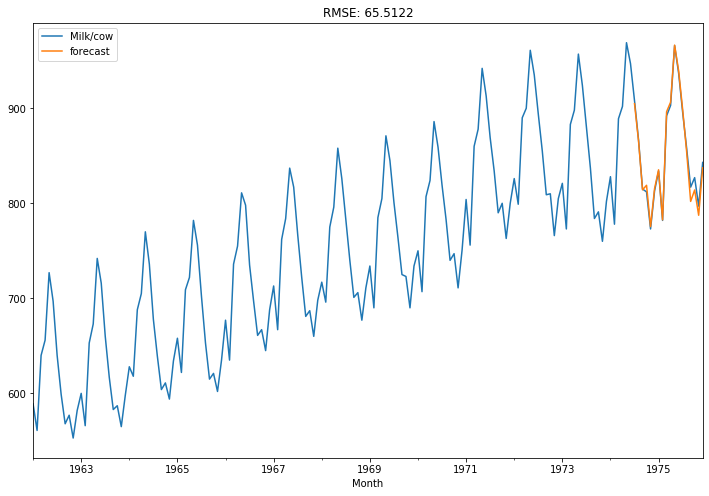

In [48]:
df['forecast'] = results.predict(start = 150, end= 168)  
df[['Milk/cow','forecast']].plot(figsize=(12,8))
plt.title('RMSE: %.4f'% np.sqrt(sum((results.predict(start=0)-df['Milk/cow']).dropna()**2)/len(df)))